# House price prediction [🔗](https://www.kaggle.com/competitions/home-data-for-ml-course/data)
by kaggle

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score

# Approach
1. Load data
2. Find useful features (less features) (remove outliers)
3. extract numerical and categorical columns
4. Make Pipeline (XGBRegressor)
5. Do hyperparameter tuning with cross-validation (10 folds)
6. Find best parameters
7. Train model on it
8. Predict prices on `test_data`
9. Submit predictions

## 1. Load data

In [3]:
house_data = pd.read_csv("../input/home-data-for-ml-course/train.csv", index_col="Id")
test_data = pd.read_csv("../input/home-data-for-ml-course/test.csv", index_col="Id")

pd.set_option("display.max_columns", house_data.shape[1])
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Finding Useful features
- removing outliers, same as previous notebook

In [4]:
outliers_index = [54, 179, 186, 250, 314, 336, 379, 441, 692, 707, 770, 799, 804, 899, 1047, 1170, 1183, 1244, 1374]
house_data.drop(labels=outliers_index, inplace=True)

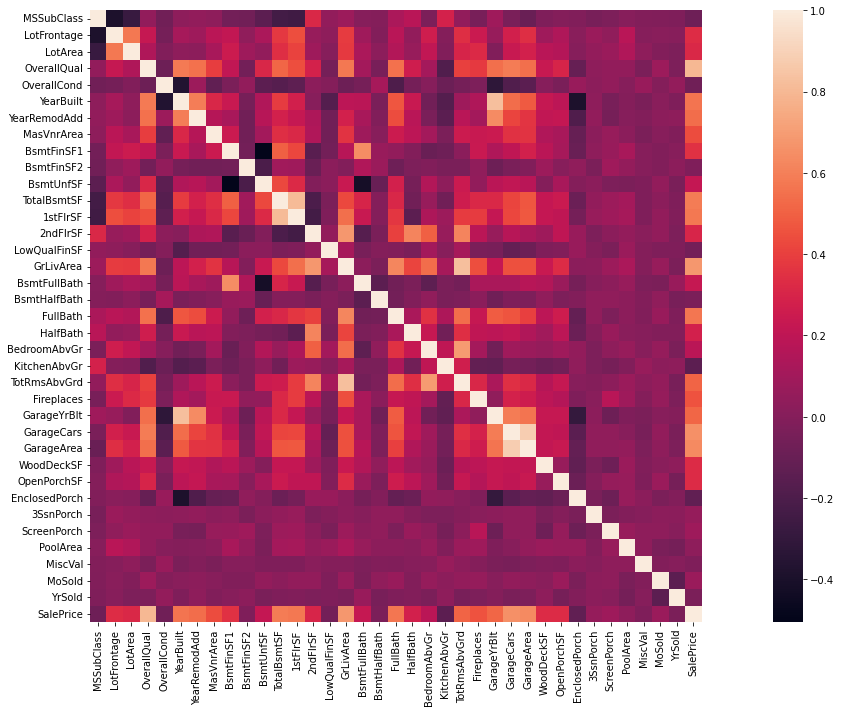

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(house_data.corr(), square=True)
plt.tight_layout()

In [6]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
useful_features = ['YearBuilt',  'CentralAir', 'TotalBsmtSF', 'BsmtFinSF1', 'MSZoning', 'OpenPorchSF', 'WoodDeckSF', "MoSold", 'LotFrontage', 'GrLivArea',
                   'BsmtFinType1', 'LotArea', 'KitchenQual', 'GarageType', 'Utilities', 'RoofStyle', 'OverallQual', 'BldgType', 'GarageYrBlt', 
                   'MasVnrArea', 'Exterior1st', 'Fireplaces', 'Condition1', 'PavedDrive', 'OverallCond', 'FireplaceQu',  'ScreenPorch', 'BsmtExposure',
                   'Street', 'MasVnrType', 'ExterCond', 'LotShape', 'TotRmsAbvGrd', 'Foundation', '1stFlrSF', 'LandSlope', 'GarageArea', 'FullBath', 
                   'HouseStyle', 'BedroomAbvGr', 'KitchenAbvGr', 'ExterQual', 'BsmtQual', "MSSubClass"]
house_data = house_data[useful_features + ["SalePrice"]]
test_data = test_data[useful_features]
X = house_data.iloc[:, :-1]
y = house_data.iloc[:, -1]
len(useful_features)

44

## 3. Extracting numerical and categorical columns

In [8]:
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(exclude=(int, float)).columns

## 4. Making Pipeline (using `XGBRegressor`)

In [9]:
class CreatePipeline:
    """Create Pipeline
    methods:
        pipeline: Create Final Pipeline
        
        create_model: Create the provided model
        
        numerical_transformer: Transform numerical cols
        
        categorical_transformer: Transform categorical cols \
        OneHotEncoding / OrdinalEncoding
        
        data_preprocessor: Preprocess the data using ColumnTransformer     
        """
    def pipeline(self, *, preprocessor, model, verbose=False):
        """Creates pipeline
        params:
            preprocessor
            model
        """
        steps = [("preprocessor", preprocessor),
                 ("model", model)]
        return Pipeline(steps=steps, verbose=verbose)
    
    
    def numerical_transformer(self, *, strategy="mean", **params):
        """Transform numerical columns using `SimpleImputer`.
        params:
            strategy: "mean" | "median" | "most_frequent" | "constant"
            **params: extra keyword args for SimpleImputer"""
        
        transformer = SimpleImputer(strategy=strategy, **params)
        return transformer
    
    
    def categorical_transformer(self, *, 
                                imp_strategy="most_frequent", 
                                encoder_type="Ordinal", 
                                imp_params={}, encoder_params={}):
        """Transform categorical columns by making Pipeline
        `SimpleImputer` | `OneHotEncoder` | `OrdinalEncoder`.
        args:
            imp_strategy: strategy for imputer values can be
                "most_frequent" | "constant"
            encoder_type: encoder type,
                "Ordinal" | "OneHot"
        kwargs:
            imp_params: keyword args for `SimpleImputer`.
            encoder_params: keyword args for encoder.`
        """
        if not encoder_type in ("Ordinal", "OneHot"):
            raise ValueError(f"Inappropriate value for encoder_type passed: {encoder_type}\
            Takes one of 'Ordinal' | 'OneHot'.")
        
        encoder = OrdinalEncoder if encoder_type=="Ordinal" else OneHotEncoder
        transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy=imp_strategy, **imp_params)),
            (encoder_type, encoder(**encoder_params))
        ])
        return transformer
    
    
    def data_preprocessor(self, *, transformers):
        """Preprocess the data using `ColumnTransformer`.
        Pass extact list of transformers
        to be passed in `ColumnTransformer`.
        each tuple consist of: (transformer_name,
                                transformer,
                                list_of_columns)."""
        preprocessor = ColumnTransformer(transformers=transformers)
        return preprocessor
    
    
    def create_model(self, *, model, random_state=0, n_estimators=1000, **kwargs):
        """Creates the model.
        **kwargs: keyword args for model."""
        my_model = model(random_state=random_state, n_estimators=n_estimators, **kwargs)
        return my_model

In [10]:
cp = CreatePipeline()

num_transformer = cp.numerical_transformer()
cat_transformer = cp.categorical_transformer(encoder_params={"handle_unknown":"use_encoded_value", "unknown_value":-1})

preprocessor = cp.data_preprocessor(
    transformers=[("num", num_transformer, num_cols),
                  ("cat", cat_transformer, cat_cols)
                 ])

## 5. Doing hyperparameter tuning on `XGBRegressor` with cross-validation (10 folds)

In [11]:
n_estimators = [250, 500, 750, 1000, 1500]
learning_rate = [0.05, 0.1]
maes = {}
i = 0
for n in n_estimators:
    for rate in learning_rate:
        i += 1
        model = cp.create_model(model=XGBRegressor, n_estimators=n, learning_rate=rate)
        pipeline = cp.pipeline(preprocessor=preprocessor, model=model)
        scores = -1 * cross_val_score(pipeline, X, y, cv=10, verbose=True,
                                scoring="neg_mean_absolute_error")
        mae = scores.mean()
        maes[i] = [n, rate, mae]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   18.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   51.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   50.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [12]:
for i in maes:
    estimators, rate, mae = maes[i]
    print(f"{i}. N_estimators: {estimators}\tLearning_rate: {rate}\tMAE: {mae:.0f}")

1. N_estimators: 250	Learning_rate: 0.05	MAE: 15093
2. N_estimators: 250	Learning_rate: 0.1	MAE: 15532
3. N_estimators: 500	Learning_rate: 0.05	MAE: 15127
4. N_estimators: 500	Learning_rate: 0.1	MAE: 15567
5. N_estimators: 750	Learning_rate: 0.05	MAE: 15172
6. N_estimators: 750	Learning_rate: 0.1	MAE: 15578
7. N_estimators: 1000	Learning_rate: 0.05	MAE: 15198
8. N_estimators: 1000	Learning_rate: 0.1	MAE: 15581
9. N_estimators: 1500	Learning_rate: 0.05	MAE: 15209
10. N_estimators: 1500	Learning_rate: 0.1	MAE: 15582


## 6. Best parameters: `n_estimators:250` and `learning_rate:0.05`
1. N_estimators: 250	Learning_rate: 0.05	MAE: 15093
2. N_estimators: 250	Learning_rate: 0.1	MAE: 15532
3. N_estimators: 500	Learning_rate: 0.05	MAE: 15127
4. N_estimators: 500	Learning_rate: 0.1	MAE: 15567
5. N_estimators: 750	Learning_rate: 0.05	MAE: 15172
6. N_estimators: 750	Learning_rate: 0.1	MAE: 15578
7. N_estimators: 1000	Learning_rate: 0.05	MAE: 15198
8. N_estimators: 1000	Learning_rate: 0.1	MAE: 15581
9. N_estimators: 1500	Learning_rate: 0.05	MAE: 15209
10. N_estimators: 1500	Learning_rate: 0.1	MAE: 15582

In [13]:
best_n_estimators = 250
best_learning_rate = 0.05

## 7. Training model on best paramters with `XGBRegressor`

In [14]:
model = cp.create_model(model=XGBRegressor, n_estimators=best_n_estimators, learning_rate=best_learning_rate)
pipeline = cp.pipeline(preprocessor=preprocessor, model=model)
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['YearBuilt', 'TotalBsmtSF', 'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF',
       'MoSold', 'LotFrontage', 'GrLivArea', 'LotArea', 'OverallQual',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'OverallCond', 'ScreenPorch',
       'TotRmsAbvGrd', '1stFlrSF', 'GarageArea', 'FullBath', 'BedroomAbvGr...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.05, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=250, n_jobs=0, num_parallel_tree=1,
                       

## 8. Predicting prices on `test_data`

In [15]:
test_preds = pipeline.predict(test_data)
test_preds

array([133285.47, 158463.9 , 188523.7 , ..., 173856.98, 109738.25,
       212184.19], dtype=float32)

## 9. Submitting predictions

In [16]:
output = pd.DataFrame({"Id": test_data.index, "SalePrice": test_preds})
output.to_csv("./submission_10.csv", index=False)